In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

import time
import requests
from datetime import datetime
from config import weather_api_key

In [2]:
#Randomize latitudes and longitudes

lats = np.random.uniform(-90.000,90.000, size=1500)
lngs = np.random.uniform(-180.000,180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

coordinates = list(lat_lngs)

In [3]:
# Create URL from the open weather map API and include our API key to the end

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create an empty list for holding the cities
cities = []

# Use a for loop to identify nearest city for each latitude and longitude combination using the citipy module
for coordinate in coordinates:
    
    # Use the citipy module to identify the nearest city to the current coordinate
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [5]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
        #we can only gather 60 calls per minute from API for free. Pause the program for 60 seconds.
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lasa
Processing Record 2 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | plant city
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | inuvik
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | coihaique
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | saleaula
City not found. Skipping...
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | santa barbara
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | tilichiki
Processing Record 19 of Set 1 | swedru
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | sorvag


Processing Record 40 of Set 4 | ambilobe
Processing Record 41 of Set 4 | bud
Processing Record 42 of Set 4 | marcona
City not found. Skipping...
Processing Record 43 of Set 4 | byron bay
Processing Record 44 of Set 4 | henties bay
Processing Record 45 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 46 of Set 4 | saint-joseph
Processing Record 47 of Set 4 | kazachinskoye
Processing Record 48 of Set 4 | komsomolskiy
Processing Record 49 of Set 4 | lashio
Processing Record 50 of Set 4 | tyukhtet
Processing Record 1 of Set 5 | voskresenskoye
Processing Record 2 of Set 5 | alofi
Processing Record 3 of Set 5 | bundaberg
Processing Record 4 of Set 5 | la ronge
Processing Record 5 of Set 5 | berlevag
Processing Record 6 of Set 5 | fairbanks
Processing Record 7 of Set 5 | trelew
Processing Record 8 of Set 5 | bay roberts
Processing Record 9 of Set 5 | mount gambier
Processing Record 10 of Set 5 | kalomo
City not found. Skipping...
Processing Record 11 of Set 5 | roebourne
P

City not found. Skipping...
Processing Record 30 of Set 8 | kharp
Processing Record 31 of Set 8 | nushki
Processing Record 32 of Set 8 | djambala
Processing Record 33 of Set 8 | barzas
Processing Record 34 of Set 8 | salym
Processing Record 35 of Set 8 | malanje
Processing Record 36 of Set 8 | buqayq
City not found. Skipping...
Processing Record 37 of Set 8 | la rioja
Processing Record 38 of Set 8 | san quintin
Processing Record 39 of Set 8 | asau
Processing Record 40 of Set 8 | hay river
Processing Record 41 of Set 8 | santa fe
Processing Record 42 of Set 8 | harbin
Processing Record 43 of Set 8 | neiafu
Processing Record 44 of Set 8 | rawson
Processing Record 45 of Set 8 | taoudenni
Processing Record 46 of Set 8 | flin flon
Processing Record 47 of Set 8 | babynino
Processing Record 48 of Set 8 | nikolsko-arkhangelskiy
City not found. Skipping...
Processing Record 49 of Set 8 | astipalaia
City not found. Skipping...
Processing Record 50 of Set 8 | san vicente
Processing Record 1 of Se

Processing Record 13 of Set 12 | novorzhev
Processing Record 14 of Set 12 | curillo
Processing Record 15 of Set 12 | kiunga
Processing Record 16 of Set 12 | lotofaga
Processing Record 17 of Set 12 | trairi
Processing Record 18 of Set 12 | zachepylivka
Processing Record 19 of Set 12 | teeli
Processing Record 20 of Set 12 | jeremie
Processing Record 21 of Set 12 | atambua
Processing Record 22 of Set 12 | bukachacha
Processing Record 23 of Set 12 | sabang
Processing Record 24 of Set 12 | champerico
Processing Record 25 of Set 12 | aflu
City not found. Skipping...
Processing Record 26 of Set 12 | havre-saint-pierre
Processing Record 27 of Set 12 | bayir
Processing Record 28 of Set 12 | abu dhabi
Processing Record 29 of Set 12 | odweyne
Processing Record 30 of Set 12 | kindu
Processing Record 31 of Set 12 | macapa
Processing Record 32 of Set 12 | aktau
Processing Record 33 of Set 12 | yar-sale
Processing Record 34 of Set 12 | gao
Processing Record 35 of Set 12 | velsk
Processing Record 36 o

In [6]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lasa,46.6166,10.7002,40.03,78,79,7.05,IT,2022-11-19 16:03:36
1,Port Elizabeth,-33.9180,25.5701,72.10,76,0,8.01,ZA,2022-11-19 16:03:36
2,Plant City,28.0186,-82.1129,69.69,72,0,10.00,US,2022-11-19 16:00:05
3,Albany,42.6001,-73.9662,37.02,56,4,4.47,US,2022-11-19 16:03:24
4,Busselton,-33.6500,115.3333,52.56,87,7,6.24,AU,2022-11-19 16:03:37
5,Ushuaia,-54.8000,-68.3000,56.82,44,40,17.27,AR,2022-11-19 16:03:37
6,Inuvik,68.3499,-133.7218,29.16,100,100,2.30,CA,2022-11-19 16:03:37
7,Carnarvon,-24.8667,113.6333,67.15,63,0,26.42,AU,2022-11-19 16:00:39
8,Coihaique,-45.5752,-72.0662,56.01,43,75,6.91,CL,2022-11-19 16:03:38
9,Bredasdorp,-34.5322,20.0403,65.84,50,1,15.73,ZA,2022-11-19 16:03:38


In [7]:
new_column_order = ['City','Country', 'Date', 'Lat', 'Lng','Max Temp', 'Humidity' ,'Cloudiness', 'Wind Speed']

In [8]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lasa,IT,2022-11-19 16:03:36,46.6166,10.7002,40.03,78,79,7.05
1,Port Elizabeth,ZA,2022-11-19 16:03:36,-33.9180,25.5701,72.10,76,0,8.01
2,Plant City,US,2022-11-19 16:00:05,28.0186,-82.1129,69.69,72,0,10.00
3,Albany,US,2022-11-19 16:03:24,42.6001,-73.9662,37.02,56,4,4.47
4,Busselton,AU,2022-11-19 16:03:37,-33.6500,115.3333,52.56,87,7,6.24
5,Ushuaia,AR,2022-11-19 16:03:37,-54.8000,-68.3000,56.82,44,40,17.27
6,Inuvik,CA,2022-11-19 16:03:37,68.3499,-133.7218,29.16,100,100,2.30
7,Carnarvon,AU,2022-11-19 16:00:39,-24.8667,113.6333,67.15,63,0,26.42
8,Coihaique,CL,2022-11-19 16:03:38,-45.5752,-72.0662,56.01,43,75,6.91
9,Bredasdorp,ZA,2022-11-19 16:03:38,-34.5322,20.0403,65.84,50,1,15.73


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Atuona
Country                        PF
Date          2022-11-19 16:03:40
Lat                          -9.8
Lng                     -139.0333
Max Temp                    76.84
Humidity                       73
Cloudiness                     40
Wind Speed                  11.81
Name: 13, dtype: object

In [10]:
# Extracting fields for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

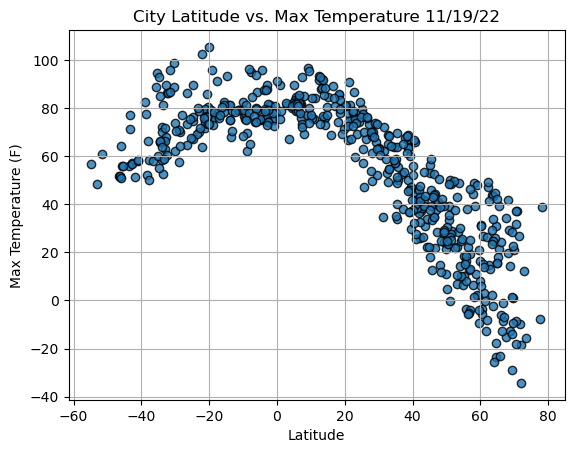

In [16]:
# Build the scatter plot for latitude vs Max Temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig1.png')

plt.show()

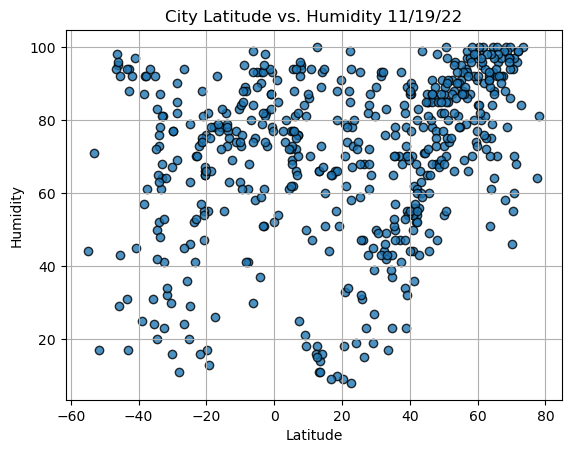

In [12]:
# Build the scatter plot for latitude vs Humidity 
plt.scatter(lats,
            humidity,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig2.png')

plt.show()

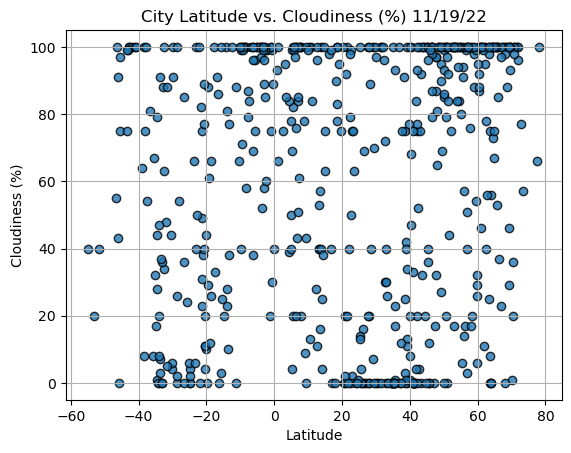

In [13]:
# Build the scatter plot for latitude vs Cloudiness 
plt.scatter(lats,
            cloudiness,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig3.png')

plt.show()

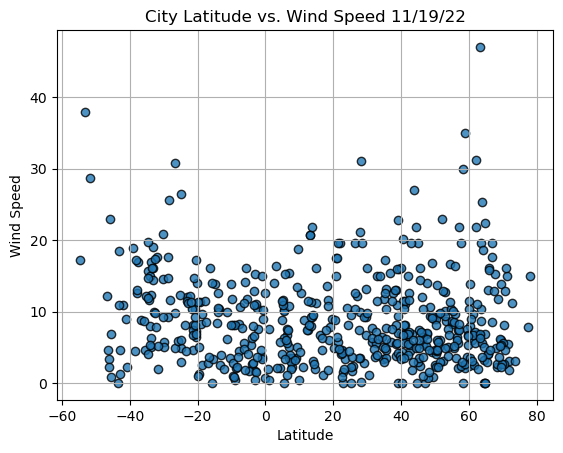

In [14]:
# Build the scatter plot for latitude vs Cloudiness 
plt.scatter(lats,
            wind_speed,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig4.png')

plt.show()

In [70]:
#import linregress
from scipy.stats import linregress

# Create a function to create and perform linear regression on the weather data
# this will plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, 'r')
    
    plt.annotate(line_eq,text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [71]:
# Nothern and Southern Hemispheres DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

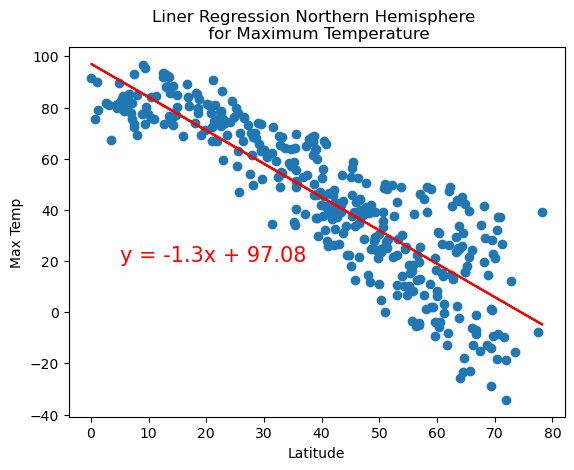

In [76]:
# Linear Regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values,
                       'Liner Regression Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp', (5,20))

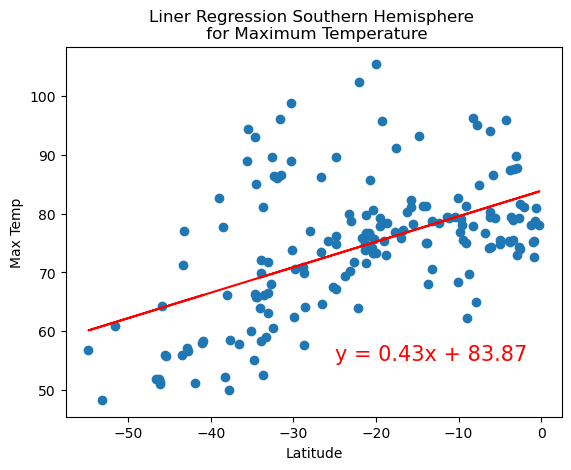

In [79]:
# Linear Regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values,
                       'Liner Regression Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp', (-25,55))

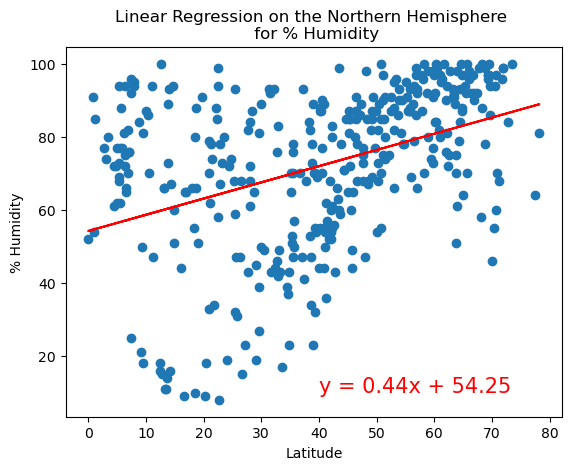

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))

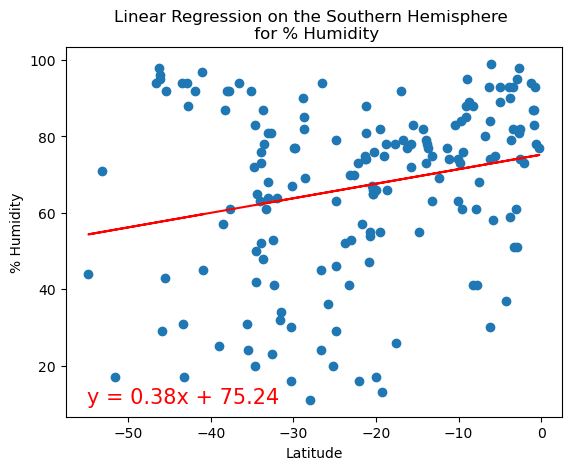

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,10))

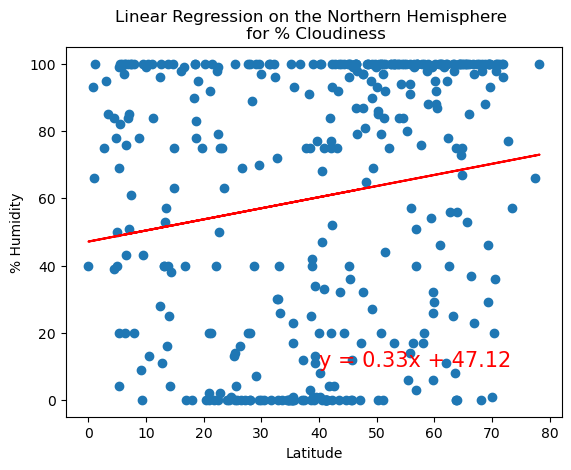

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(40,10))

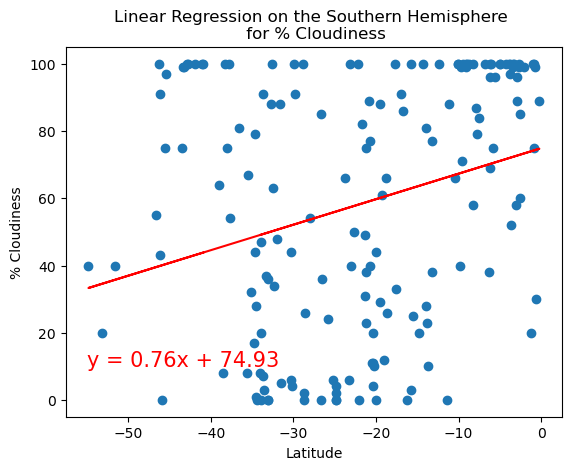

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,10))

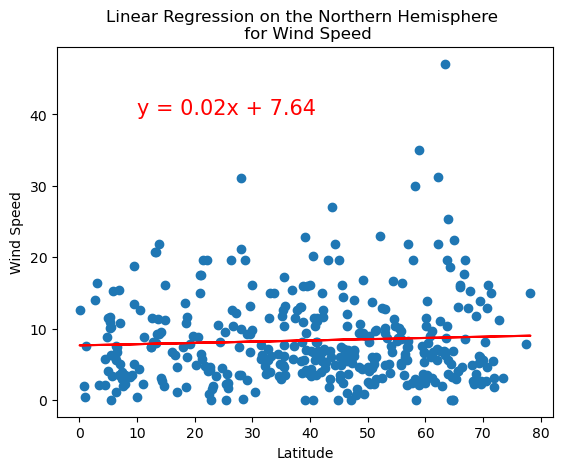

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(10,40))

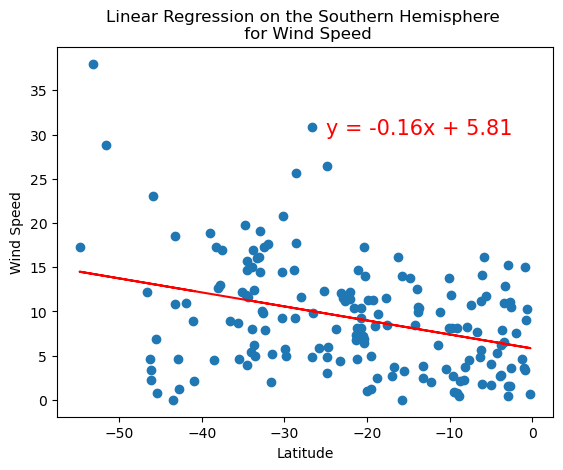

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-25,30))